# Capstone Project

In [352]:
import numpy as np
import pandas as pd

In [353]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Introduction/Business Problem 

-to solve this problem , i ll review the dataset. so we will have three type of features
    * X : they will be used to predict target ones
    * Y: Targets
    * not relevant : to be droped
-each X  feature will be reviewed for NAN value to be replaced, then values are standarized.

-Finally, we use X to predict Y through different models

# Data 

* X : [X,Y,ADDRTYPE,INTKEY,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,LIGHTCOND
,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR]


* Y :[SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE]


* Drop : ['OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS' 
'LOCATION','EXCEPTRSNDESC','EXCEPTRSNCODE','SEVERITYCODE.1','SEVERITYDESC'
,'INCDATE','SDOT_COLDESC','SDOTCOLNUM','ST_COLDESC']

In [354]:
df=pd.read_csv(r'Data-Collisions.csv')

C:\Users\mohammad\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [355]:
#df.iloc[:,38]
drop=['OBJECTID','INCKEY','INTKEY','COLDETKEY','REPORTNO','STATUS' ,'LOCATION','EXCEPTRSNDESC','EXCEPTRSNCODE','SEVERITYCODE.1','SEVERITYDESC'
     ,'INCDATE','SDOT_COLDESC','SDOTCOLNUM','ST_COLDESC']
df1=df.drop(drop,axis=1)
df1.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,3/27/2013 2:54:00 PM,...,N,Overcast,Wet,Daylight,NaN,NaN,10,0,0,N
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,...,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,0,0,N
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,...,0,Overcast,Dry,Daylight,NaN,NaN,32,0,0,N
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,3/29/2013 9:26:00 AM,...,N,Clear,Dry,Daylight,NaN,NaN,23,0,0,N
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,1/28/2004 8:04:00 AM,...,0,Raining,Wet,Daylight,NaN,NaN,10,0,0,N


In [356]:
for i in df1.columns:
    print(df1.isna()[i].value_counts())
#x=[X,Y,ADDRTYPE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR]    
#Y=[SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE]

False    194673
Name: SEVERITYCODE, dtype: int64
False    189339
True       5334
Name: X, dtype: int64
False    189339
True       5334
Name: Y, dtype: int64
False    192747
True       1926
Name: ADDRTYPE, dtype: int64
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64
False    194673
Name: PERSONCOUNT, dtype: int64
False    194673
Name: PEDCOUNT, dtype: int64
False    194673
Name: PEDCYLCOUNT, dtype: int64
False    194673
Name: VEHCOUNT, dtype: int64
False    194673
Name: INCDTTM, dtype: int64
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64
False    194673
Name: SDOT_COLCODE, dtype: int64
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64
False    189789
True       4884
Name: UNDERINFL, dtype: int64
False    189592
True       5081
Name: WEATHER, dtype: int64
False    189661
True       5012
Name: ROADCOND, dtype: int64
False    189503
True       5170
Name: LIGHTCOND, dtype: int64
True     190006
False      4667
Name: PEDROWNOTGRNT, dtype: 

In [357]:
df1['INATTENTIONIND'].replace(np.NAN,'N',inplace=True)
df1['UNDERINFL'].replace('0','N',inplace=True)
df1['UNDERINFL'].replace('1','Y',inplace=True)
df1['SPEEDING'].replace(np.NAN,'N',inplace=True)
df1['PEDROWNOTGRNT'].replace(np.NAN,'N',inplace=True)

In [358]:
df1.dropna(subset=['SEVERITYCODE'],how='any',inplace=True)

In [359]:
df_1=df1[df1['SEVERITYCODE']==1]
df_2=df1[df1['SEVERITYCODE']==2]

In [360]:
mean1=df_1[ df_1.notna()]._get_numeric_data().mean()
mean1
mean2=df_2[ df_2.notna()]._get_numeric_data().mean()


In [361]:
mean1={'X':mean1[1],'Y':mean1[2],'PERSONCOUNT':mean1[3],'PEDCOUNT':mean1[4],'PEDCYLCOUNT':mean1[5],'VEHCOUNT':mean1[6],'SDOT_COLCODE':mean1[7],'SEGLANEKEY':mean1[8],'CROSSWALKKEY':mean1[9]}

mean2={'X':mean2[1],'Y':mean2[2],'PERSONCOUNT':mean2[3],'PEDCOUNT':mean2[4],'PEDCYLCOUNT':mean2[5],'VEHCOUNT':mean2[6],'SDOT_COLCODE':mean2[7],'SEGLANEKEY':mean2[8],'CROSSWALKKEY':mean2[9]}


In [362]:

mean1

{'X': -122.3307215437886,
 'Y': 47.61888786106305,
 'PERSONCOUNT': 2.3293475473495255,
 'PEDCOUNT': 0.005267978166098839,
 'PEDCYLCOUNT': 0.004974905667289446,
 'VEHCOUNT': 1.9433124519177931,
 'SDOT_COLCODE': 13.020551708979008,
 'SEGLANEKEY': 43.64398285525882,
 'CROSSWALKKEY': 1520.236209107228}

In [363]:
df_1

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,...,N,Raining,Wet,Dark - Street Lights On,N,N,11,0,0,N
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,...,N,Overcast,Dry,Daylight,N,N,32,0,0,N
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,3/29/2013 9:26:00 AM,...,N,Clear,Dry,Daylight,N,N,23,0,0,N
5,1,-122.387598,47.690575,Intersection,Angles,2,0,0,2,4/20/2019 5:42:00 PM,...,N,Clear,Dry,Daylight,N,N,10,0,0,N
6,1,-122.338485,47.618534,Intersection,Angles,2,0,0,2,12/9/2008,...,N,Raining,Wet,Daylight,N,N,10,0,0,N
8,1,-122.335930,47.611904,Block,Parked Car,2,0,0,2,6/15/2006 1:00:00 PM,...,N,Clear,Dry,Daylight,N,N,32,0,0,N
10,1,NaN,NaN,Alley,Other,2,0,0,2,5/25/2006 6:20:00 PM,...,N,Overcast,Dry,Daylight,N,N,22,0,0,N
11,1,-122.333831,47.547371,Intersection,Angles,2,0,0,2,8/11/2005 5:30:00 PM,...,N,Clear,Dry,Daylight,N,N,10,0,0,N
12,1,-122.356273,47.571375,Block,Rear Ended,0,0,0,2,5/17/2006 12:51:00 PM,...,N,Raining,Wet,Dark - Street Lights On,N,N,14,0,0,N
13,1,-122.323966,47.606374,Block,Parked Car,2,0,0,2,12/22/2005 5:13:00 PM,...,N,Raining,Wet,Dark - No Street Lights,N,N,32,0,0,N


In [364]:
df_1.fillna(value=mean1,axis=0,inplace=True)
df_2.fillna(value=mean2,axis=0,inplace=True)

C:\Users\mohammad\Miniconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [365]:
df_1

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,...,N,Raining,Wet,Dark - Street Lights On,N,N,11,0,0,N
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,...,N,Overcast,Dry,Daylight,N,N,32,0,0,N
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,3/29/2013 9:26:00 AM,...,N,Clear,Dry,Daylight,N,N,23,0,0,N
5,1,-122.387598,47.690575,Intersection,Angles,2,0,0,2,4/20/2019 5:42:00 PM,...,N,Clear,Dry,Daylight,N,N,10,0,0,N
6,1,-122.338485,47.618534,Intersection,Angles,2,0,0,2,12/9/2008,...,N,Raining,Wet,Daylight,N,N,10,0,0,N
8,1,-122.335930,47.611904,Block,Parked Car,2,0,0,2,6/15/2006 1:00:00 PM,...,N,Clear,Dry,Daylight,N,N,32,0,0,N
10,1,-122.330722,47.618888,Alley,Other,2,0,0,2,5/25/2006 6:20:00 PM,...,N,Overcast,Dry,Daylight,N,N,22,0,0,N
11,1,-122.333831,47.547371,Intersection,Angles,2,0,0,2,8/11/2005 5:30:00 PM,...,N,Clear,Dry,Daylight,N,N,10,0,0,N
12,1,-122.356273,47.571375,Block,Rear Ended,0,0,0,2,5/17/2006 12:51:00 PM,...,N,Raining,Wet,Dark - Street Lights On,N,N,14,0,0,N
13,1,-122.323966,47.606374,Block,Parked Car,2,0,0,2,12/22/2005 5:13:00 PM,...,N,Raining,Wet,Dark - No Street Lights,N,N,32,0,0,N


In [366]:
for i in df_1[ df_1.notna()].columns:
    if df_1[ df_1.notna()].loc[:,i].dtype=='object':
        df_1.loc[:,i].fillna(value=df_1[ df_1.notna()].loc[:,i].value_counts().idxmax(),axis=0,inplace=True)
        print(df_1[ df_1.notna()].loc[:,i].value_counts().idxmax())

#mean1=df_1[ df_1.notna()]._get_numeric_data().mean()
#mean1
#mean2=df_2[ df_2.notna()]._get_numeric_data().mean()
#print(df_1['ADDRTYPE'].dtype=='object')


Block
Parked Car
10/3/2008
Mid-Block (not related to intersection)
N
N
Clear
Dry
Daylight
N
N
32
N


In [367]:
for i in df_2[ df_2.notna()].columns:
    if df_2[ df_2.notna()].loc[:,i].dtype=='object':
        df_2.loc[:,i].fillna(value=df_2[ df_2.notna()].loc[:,i].value_counts().idxmax(),axis=0,inplace=True)
        print(df_2[ df_2.notna()].loc[:,i].value_counts().idxmax())


Block
Rear Ended
11/2/2006
At Intersection (intersection related)
N
N
Clear
Dry
Daylight
N
N
10
N


In [368]:
df1=pd.concat([df_1,df_2])
df1

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,...,N,Raining,Wet,Dark - Street Lights On,N,N,11,0,0,N
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,...,N,Overcast,Dry,Daylight,N,N,32,0,0,N
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,3/29/2013 9:26:00 AM,...,N,Clear,Dry,Daylight,N,N,23,0,0,N
5,1,-122.387598,47.690575,Intersection,Angles,2,0,0,2,4/20/2019 5:42:00 PM,...,N,Clear,Dry,Daylight,N,N,10,0,0,N
6,1,-122.338485,47.618534,Intersection,Angles,2,0,0,2,12/9/2008,...,N,Raining,Wet,Daylight,N,N,10,0,0,N
8,1,-122.335930,47.611904,Block,Parked Car,2,0,0,2,6/15/2006 1:00:00 PM,...,N,Clear,Dry,Daylight,N,N,32,0,0,N
10,1,-122.330722,47.618888,Alley,Other,2,0,0,2,5/25/2006 6:20:00 PM,...,N,Overcast,Dry,Daylight,N,N,22,0,0,N
11,1,-122.333831,47.547371,Intersection,Angles,2,0,0,2,8/11/2005 5:30:00 PM,...,N,Clear,Dry,Daylight,N,N,10,0,0,N
12,1,-122.356273,47.571375,Block,Rear Ended,0,0,0,2,5/17/2006 12:51:00 PM,...,N,Raining,Wet,Dark - Street Lights On,N,N,14,0,0,N
13,1,-122.323966,47.606374,Block,Parked Car,2,0,0,2,12/22/2005 5:13:00 PM,...,N,Raining,Wet,Dark - No Street Lights,N,N,32,0,0,N


In [369]:
import matplotlib.pyplot as plt
import seaborn as sns

In [370]:
def draw_bar_perc(c):
    ((df1.groupby([c,'SEVERITYCODE']).count()['ST_COLCODE']/df1.groupby([c]).count()['ST_COLCODE'])*100).unstack().plot(kind='bar')

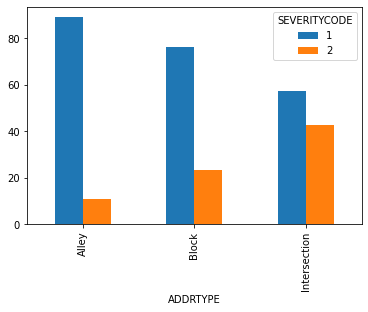

In [371]:
draw_bar_perc('ADDRTYPE')


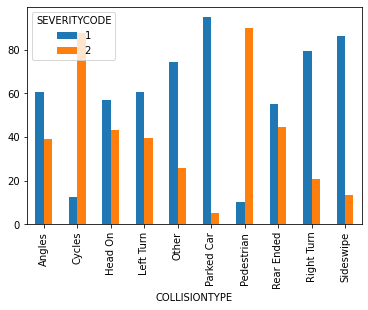

In [372]:
draw_bar_perc('COLLISIONTYPE')


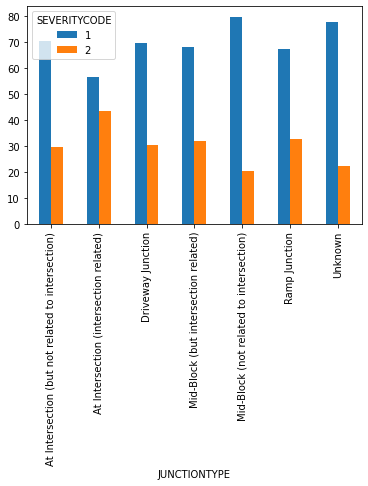

In [373]:
draw_bar_perc('JUNCTIONTYPE')


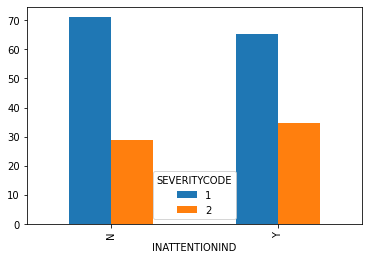

In [374]:
draw_bar_perc('INATTENTIONIND')


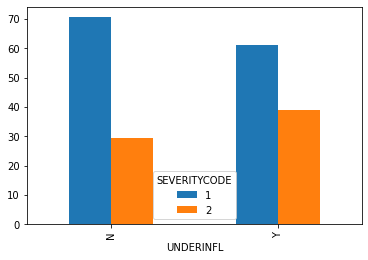

In [375]:
draw_bar_perc('UNDERINFL')


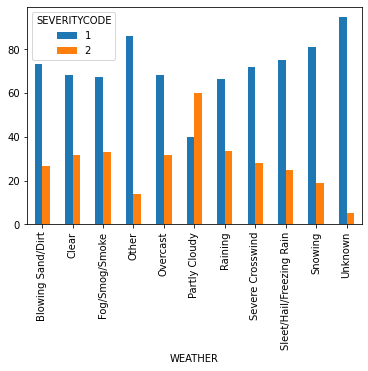

In [376]:
draw_bar_perc('WEATHER')


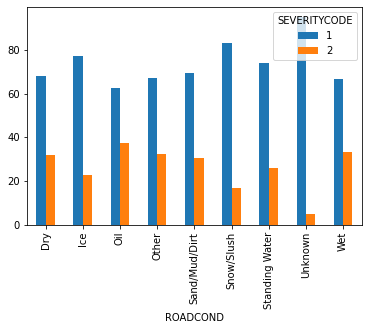

In [377]:
draw_bar_perc('ROADCOND')


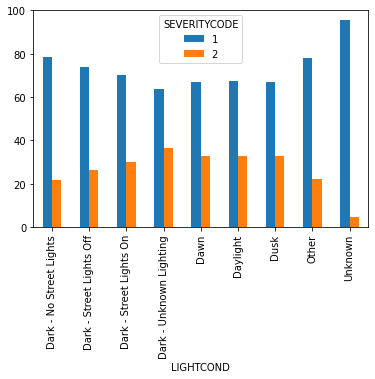

In [378]:
draw_bar_perc('LIGHTCOND')


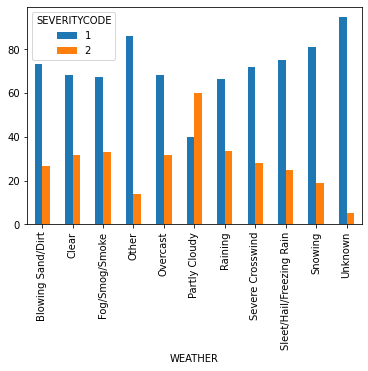

In [379]:
draw_bar_perc('WEATHER')


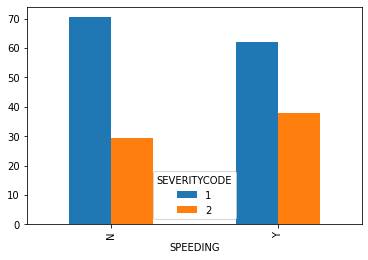

In [380]:
draw_bar_perc('SPEEDING')


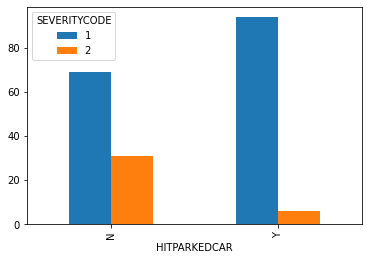

In [381]:
draw_bar_perc('HITPARKEDCAR')

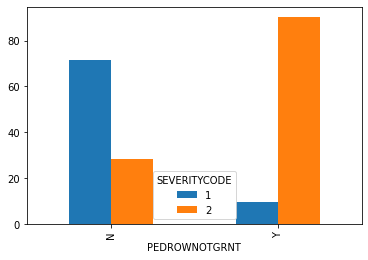

In [382]:
draw_bar_perc('PEDROWNOTGRNT')

In [386]:
df1._get_numeric_data().columns

Index(['SEVERITYCODE', 'X', 'Y', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'SDOT_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY'],
      dtype='object')

In [387]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df2=scaler.fit_transform(df1._get_numeric_data())
df2=pd.DataFrame(df2,columns=df1._get_numeric_data().columns)
df2['SEVERITYCODE']=df2['SEVERITYCODE'].apply(lambda x:1 if ( x<0) else 2 )


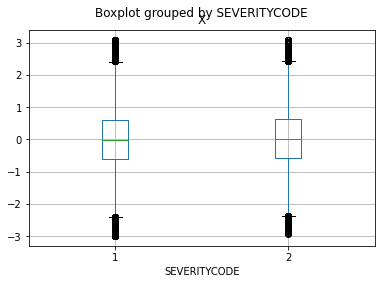

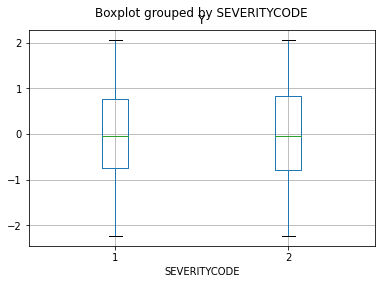

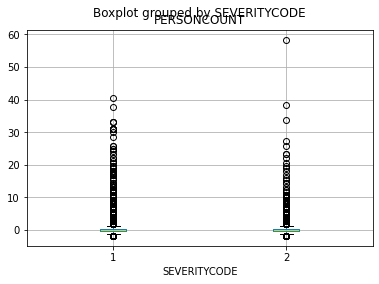

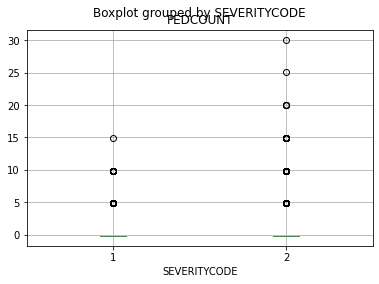

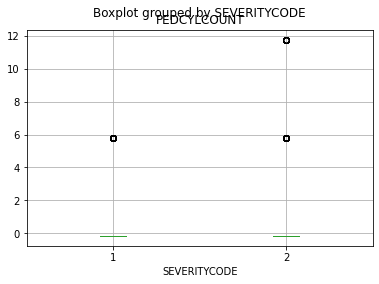

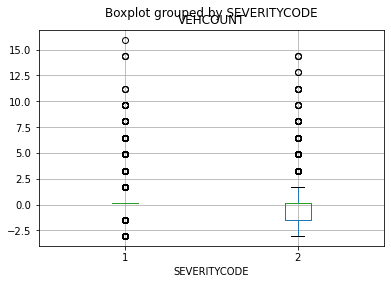

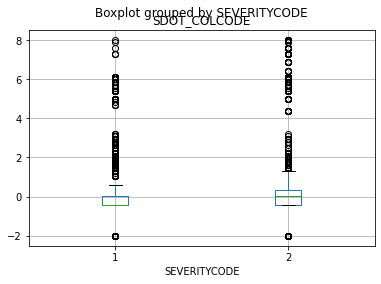

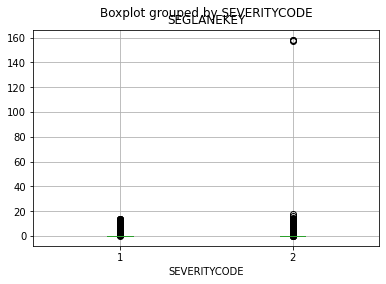

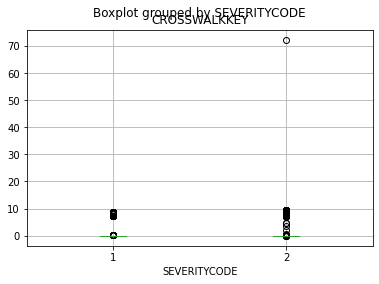

In [388]:
for i in df2.columns[1:]:
    df2.boxplot(by='SEVERITYCODE',column=i)

In [393]:
scalerX=StandardScaler()
scalerY=StandardScaler()
df1.loc[:,'X']=pd.Series(scalerX.fit_transform(np.array(df1['X']).reshape(-1,1)).reshape(1,-1)[0])
df1.loc[:,'Y']=pd.Series(scalerY.fit_transform(np.array(df1['Y']).reshape(-1,1)).reshape(1,-1)[0])

In [394]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

In [395]:
x=['ADDRTYPE','INCDTTM','JUNCTIONTYPE','INATTENTIONIND','UNDERINFL','WEATHER','LIGHTCOND','PEDROWNOTGRNT',
   'SPEEDING','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR']    
y=['SEVERITYCODE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SDOT_COLCODE','X','Y']

In [396]:

X=df1[x]
Y=df1[y[0]]

In [397]:
X

,ADDRTYPE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
1,Block,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),N,N,Raining,Dark - Street Lights On,N,N,0,0,N
2,Block,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),N,N,Overcast,Daylight,N,N,0,0,N
3,Block,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),N,N,Clear,Daylight,N,N,0,0,N
5,Intersection,4/20/2019 5:42:00 PM,At Intersection (intersection related),N,N,Clear,Daylight,N,N,0,0,N
6,Intersection,12/9/2008,At Intersection (intersection related),N,N,Raining,Daylight,N,N,0,0,N
8,Block,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),N,N,Clear,Daylight,N,N,0,0,N
10,Alley,5/25/2006 6:20:00 PM,Driveway Junction,N,N,Overcast,Daylight,N,N,0,0,N
11,Intersection,8/11/2005 5:30:00 PM,At Intersection (intersection related),N,N,Clear,Daylight,N,N,0,0,N
12,Block,5/17/2006 12:51:00 PM,Mid-Block (not related to intersection),N,N,Raining,Dark - Street Lights On,N,N,0,0,N
13,Block,12/22/2005 5:13:00 PM,Mid-Block (not related to intersection),N,N,Raining,Dark - No Street Lights,N,N,0,0,N


In [398]:
def to_gat(c,X):
    temp=label_binarize(X[c],classes=X[c].value_counts().index)
    temp=pd.DataFrame(temp,columns=X[c].value_counts().index)
    X=pd.concat([X,temp],axis=1)
    X.drop(columns=c,inplace=True)
    return X

In [399]:
obj=['ADDRTYPE','JUNCTIONTYPE','WEATHER','LIGHTCOND'
     ]
num=['X','Y','SEGLANEKEY','CROSSWALKKEY']
#'SPEEDING','INATTENTIONIND','UNDERINFL','HITPARKEDCAR'
#'INCDTTM',
for i in obj:
    print(i)
    X=to_gat(i,X)

ADDRTYPE
JUNCTIONTYPE
WEATHER
LIGHTCOND


In [400]:
X

,INCDTTM,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Block,Intersection,...,Partly Cloudy,Daylight,Dark - Street Lights On,Unknown,Dusk,Dawn,Dark - No Street Lights,Dark - Street Lights Off,Other,Dark - Unknown Lighting
0,3/27/2013 2:54:00 PM,N,N,N,N,0,0,N,1,0,...,0,1,0,0,0,0,0,0,0,0
1,12/20/2006 6:55:00 PM,N,N,N,N,0,0,N,1,0,...,0,0,1,0,0,0,0,0,0,0
2,11/18/2004 10:20:00 AM,N,N,N,N,0,0,N,1,0,...,0,1,0,0,0,0,0,0,0,0
3,3/29/2013 9:26:00 AM,N,N,N,N,0,0,N,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1/28/2004 8:04:00 AM,N,N,N,N,0,0,N,0,1,...,0,1,0,0,0,0,0,0,0,0
5,4/20/2019 5:42:00 PM,N,N,N,N,0,0,N,1,0,...,0,1,0,0,0,0,0,0,0,0
6,12/9/2008,N,N,N,N,0,0,N,0,0,...,0,1,0,0,0,0,0,0,0,0
7,4/15/2020 5:47:00 PM,N,N,N,N,6855,0,N,0,1,...,0,1,0,0,0,0,0,0,0,0
8,6/15/2006 1:00:00 PM,N,N,N,N,0,0,N,1,0,...,0,1,0,0,0,0,0,0,0,0
9,3/20/2006 3:49:00 PM,N,N,N,N,0,0,N,1,0,...,0,1,0,0,0,0,0,0,0,0


In [401]:
# for i in ['SPEEDING','INATTENTIONIND','UNDERINFL','HITPARKEDCAR','PEDROWNOTGRNT']:
#     X[i].replace('Y',1,inplace=True)
#     X[i].replace('N',0,inplace=True)

In [402]:
X.replace('Y','1',inplace=True)
X.replace('N','0',inplace=True)

In [403]:
X

,INCDTTM,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Block,Intersection,...,Partly Cloudy,Daylight,Dark - Street Lights On,Unknown,Dusk,Dawn,Dark - No Street Lights,Dark - Street Lights Off,Other,Dark - Unknown Lighting
0,3/27/2013 2:54:00 PM,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,12/20/2006 6:55:00 PM,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,11/18/2004 10:20:00 AM,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,3/29/2013 9:26:00 AM,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1/28/2004 8:04:00 AM,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
5,4/20/2019 5:42:00 PM,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
6,12/9/2008,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,4/15/2020 5:47:00 PM,0,0,0,0,6855,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8,6/15/2006 1:00:00 PM,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
9,3/20/2006 3:49:00 PM,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [404]:
X['INCDTTM']=pd.to_datetime(X['INCDTTM'])

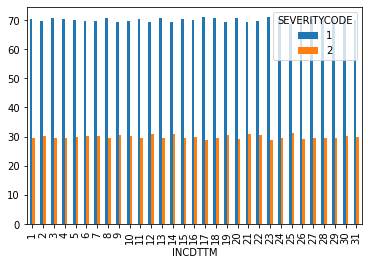

In [405]:
draw_bar_perc(X['INCDTTM'].dt.day)

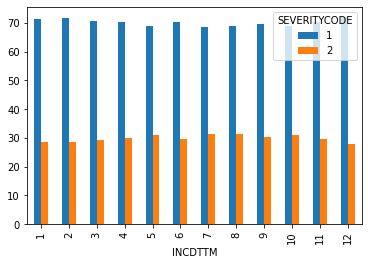

In [406]:
draw_bar_perc(X['INCDTTM'].dt.month)

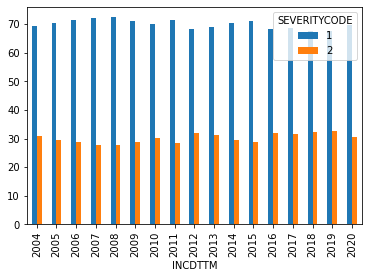

In [407]:
draw_bar_perc(X['INCDTTM'].dt.year)

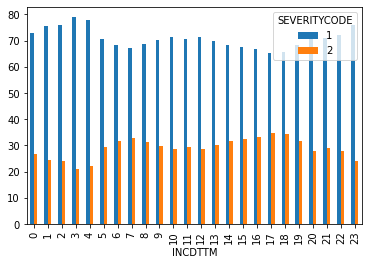

In [408]:
draw_bar_perc(X['INCDTTM'].dt.hour)

In [409]:
X['Hour']=X['INCDTTM'].dt.hour
X['Month']=X['INCDTTM'].dt.month
X['Year']=X['INCDTTM'].dt.year

In [410]:
X=X.apply(pd.to_numeric)


In [411]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194673 entries, 0 to 194672
Data columns (total 41 columns):
INCDTTM                                              194673 non-null int64
INATTENTIONIND                                       194673 non-null int64
UNDERINFL                                            194673 non-null int64
PEDROWNOTGRNT                                        194673 non-null int64
SPEEDING                                             194673 non-null int64
SEGLANEKEY                                           194673 non-null int64
CROSSWALKKEY                                         194673 non-null int64
HITPARKEDCAR                                         194673 non-null int64
Block                                                194673 non-null int64
Intersection                                         194673 non-null int64
Alley                                                194673 non-null int64
Mid-Block (not related to intersection)              194673 non-

In [412]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.33,random_state=13)

In [413]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor,BernoulliRBM
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [414]:
model2=LogisticRegression()
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.7007456065252246

In [415]:
model3=KNeighborsClassifier()
model3.fit(X_train,y_train)
model3.score(X_train,y_train),model3.score(X_test,y_test)

(0.9906539906463236, 0.9880142583627788)

In [416]:
model1=DecisionTreeClassifier()
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.9842317450928506

In [417]:
from sklearn import metrics
#X=df1[x]
Y=df1['PERSONCOUNT']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.33,random_state=13)

In [418]:
model2=LinearRegression()
model2.fit(X_train,y_train)
model2.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,model2.predict(X_test)))

1.3901239131828935

In [419]:
model2=KNeighborsRegressor(n_neighbors=10)
model2.fit(X_train,y_train)
model2.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,model2.predict(X_test)))

1.4337778457661285

In [420]:

model2=DecisionTreeRegressor()
model2.fit(X_train,y_train)
model2.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,model2.predict(X_test)))

1.9091205782018823

In [421]:
# poly=preprocessing.PolynomialFeatures()
# X_train1=poly.fit_transform(X_train)
# X_test1=poly.transform(X_test)
# model2=LinearRegression()
# model2.fit(X_train1,y_train)
# model2.predict(X_test1)
# np.sqrt(metrics.mean_squared_error(y_test,model2.predict(X_test1)))


In [422]:
# model2=KNeighborsRegressor()
# model2.fit(X_train1,y_train)
# model2.predict(X_test1)
# np.sqrt(metrics.mean_squared_error(y_test,model2.predict(X_test1)))

In [423]:
# model2=MLPRegressor(hidden_layer_sizes=(8,),max_iter=200000000)
# model2.fit(X_train1,y_train)
# model2.predict(X_test1)
# metrics.mean_squared_error(y_test,model2.predict(X_test1))

In [424]:

# model2=GaussianNB()
# model2.fit(X_train1,y_train)
# model2.predict(X_test1)
# np.sqrt(metrics.mean_squared_error(y_test,model2.predict(X_test1)))

In [425]:
Y=df1['PERSONCOUNT']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.33,random_state=13)
model2=LinearRegression()
model2.fit(X_train,y_train)
model2.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,model2.predict(X_test)))

1.3901239131828935

In [426]:
#'PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT'

Y=df1['PEDCOUNT']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.33,random_state=13)
model2=LinearRegression()
model2.fit(X_train,y_train)
model2.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,model2.predict(X_test)))

0.19346765685506337

In [427]:
Y=df1['PEDCYLCOUNT']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.33,random_state=13)
model2=LinearRegression()
model2.fit(X_train,y_train)
model2.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,model2.predict(X_test)))

0.16506922986125658

In [428]:
Y=df1['VEHCOUNT']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.33,random_state=13)
model2=LinearRegression()
model2.fit(X_train,y_train)
model2.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,model2.predict(X_test)))

0.6277539382613896

In [429]:

Y=df1['SDOT_COLCODE']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.33,random_state=13)
model2=LinearRegression()
model2.fit(X_train,y_train)
model2.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,model2.predict(X_test)))

6.81983611895563

In [430]:
model2=KNeighborsRegressor()
model2.fit(X_train,y_train)
model2.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,model2.predict(X_test)))

7.375362468756233

In [431]:

model2=DecisionTreeRegressor()
model2.fit(X_train,y_train)
model2.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,model2.predict(X_test)))

9.654477074431593

In [435]:
Y=df1['X']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.33,random_state=13)
model2=LinearRegression()
model2.fit(X_train,y_train)
model2.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,model2.predict(X_test)))

1.0008426888789277

In [436]:
Y=df1['Y']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.33,random_state=13)
model2=LinearRegression()
model2.fit(X_train,y_train)
model2.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,model2.predict(X_test)))

1.0001141910240419

In [440]:
Y=df1['COLLISIONTYPE']
Y=pd.DataFrame(Y,columns=['COLLISIONTYPE'])
Y=to_gat('COLLISIONTYPE',Y)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.33,random_state=13)


In [441]:
df1['COLLISIONTYPE'].value_counts().index

Index(['Parked Car', 'Rear Ended', 'Angles', 'Other', 'Sideswipe', 'Left Turn',
       'Pedestrian', 'Cycles', 'Right Turn', 'Head On'],
      dtype='object')

In [442]:
for i in ['Parked Car', 'Rear Ended', 'Angles', 'Other', 'Sideswipe', 'Left Turn','Pedestrian', 'Cycles', 'Right Turn', 'Head On'] :
    model2=KNeighborsClassifier()
    model2.fit(X_train,y_train[i])
    print(i,':',model2.score(X_test,y_test[i]))

Parked Car : 0.6903475865074794
Rear Ended : 0.7905919711096929
Angles : 0.7944523138707719
Other : 0.8663823295923291
Sideswipe : 0.8948679233535172
Left Turn : 0.9273850847563159
Pedestrian : 0.9642295658670984
Cycles : 0.9707672431237645
Right Turn : 0.9847142879379854
Head On : 0.9895864140840247


In [443]:
for i in ['Parked Car', 'Rear Ended', 'Angles', 'Other', 'Sideswipe', 'Left Turn','Pedestrian', 'Cycles', 'Right Turn', 'Head On'] :
    model2=LogisticRegression()
    model2.fit(X_train,y_train[i])
    print(i,':',model2.score(X_test,y_test[i]))

C:\Users\mohammad\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Parked Car : 0.7325156048129757


C:\Users\mohammad\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Rear Ended : 0.8213501860124839


C:\Users\mohammad\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Angles : 0.8213190542160236


C:\Users\mohammad\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Other : 0.8783213735348598


C:\Users\mohammad\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Sideswipe : 0.9030711517208101


C:\Users\mohammad\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Left Turn : 0.930467132605887


C:\Users\mohammad\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pedestrian : 0.9663776598228601


C:\Users\mohammad\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Cycles : 0.9722304375573992


C:\Users\mohammad\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Right Turn : 0.9847609856326759
Head On : 0.9895864140840247


C:\Users\mohammad\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
